 # <center> Interpolazione 1D, Uncertainty Evaluation, Fitting</center>

In [1]:
import pandas as pd
import numpy as np 
import scipy as smp
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#import scienceplots
#plt.style.use(['science','notebook'])

In [2]:
dfg=pd.read_excel('Datas.xlsx',header=0)
dfg.columns=[r"Reg(cm)","Shim(digit)","initial_Reg","initial_shim","Diff. $\rho$","Int. $\rho$","Time","STD_Time $\sigma$"]
dfg[["Diff. $\rho$", "Int. $\rho$"]] *= 10**5 #pcm
dfg

,Reg(cm),Shim(digit),initial_Reg,initial_shim,Diff. $\rho$,Int. $\rho$,Time,STD_Time $\sigma$
0,7.178261,573,128,258,104.146091,104.146091,24.801111,1.478170
1,12.589565,548,258,356,147.433394,251.579485,14.730000,1.373806
2,15.736957,518,356,413,100.173055,351.752540,26.193000,1.112965
3,18.111304,496,413,456,71.065091,422.817631,41.381000,0.903025
4,20.099130,481,456,492,65.599237,488.416867,45.790000,1.711198
5,24.571739,465,492,573,154.328686,642.745553,13.683333,1.039359
6,28.989130,435,573,653,116.559283,759.304836,21.093750,1.064907
7,34.731739,410,653,757,90.749530,850.054365,30.006250,1.821780
8,38.100000,389,757,818,16.429645,866.484011,220.750000,16.875595


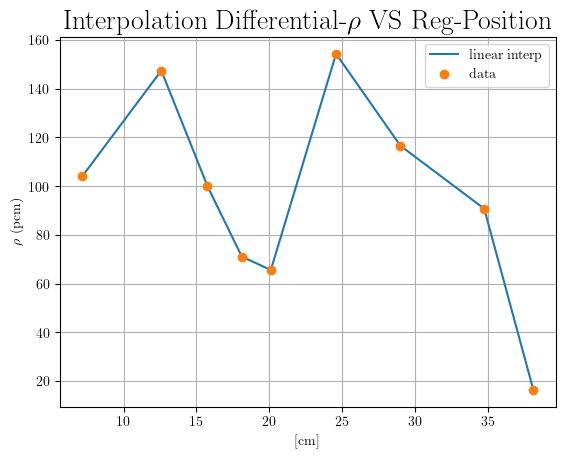

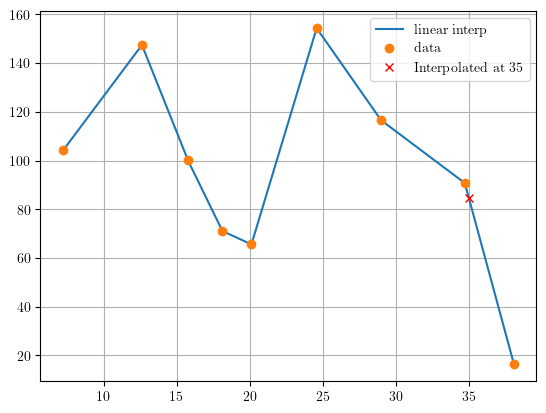

In [3]:
x = dfg.iloc[:,0]
y = dfg.iloc[:,4]

xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew = np.interp(xnew, x, y)

plt.title(r'Interpolation Differential-$\rho$ VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$\rho$ (pcm)')
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 35
specific_y = np.interp(specific_x, x, y)

plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.plot(specific_x, specific_y, 'rx', label=f'Interpolated at {specific_x}')
plt.legend(loc='best')
plt.grid()
plt.show()

In [4]:
gamma=dfg.iloc[0,0]
zeet=dfg.iloc[-1,0]
zeet

38.1

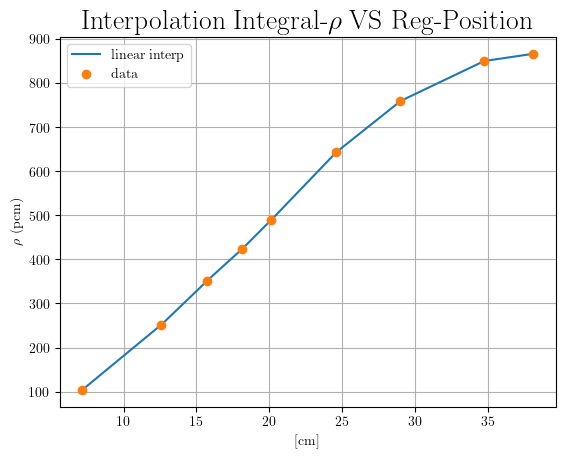

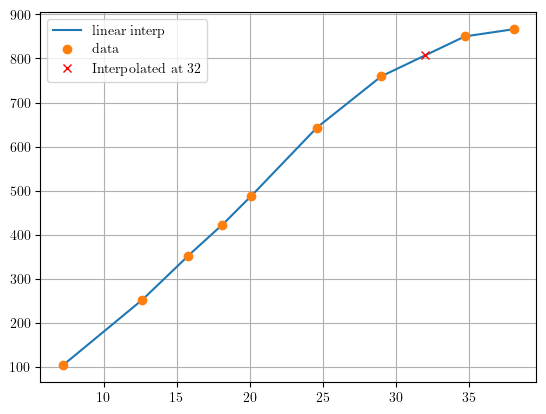

In [5]:
x = dfg.iloc[:,0]
y = dfg.iloc[:,5]

xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew_Irho = np.interp(xnew, x, y)

plt.title(r'Interpolation Integral-$\rho$ VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$\rho$ (pcm)')
plt.plot(xnew, ynew_Irho, '-', label='linear interp')
plt.plot(x, y,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 32
specific_y = np.interp(specific_x, x, y)

plt.plot(xnew, ynew_Irho, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.plot(specific_x, specific_y, 'rx', label=f'Interpolated at {specific_x}')
plt.legend(loc='best')
plt.grid()
plt.show()

 # inteprolare la funzione del tempo in modo tale che il numero di elementi matcha sia per la funzione del tempo che la funzione delle $\rho$

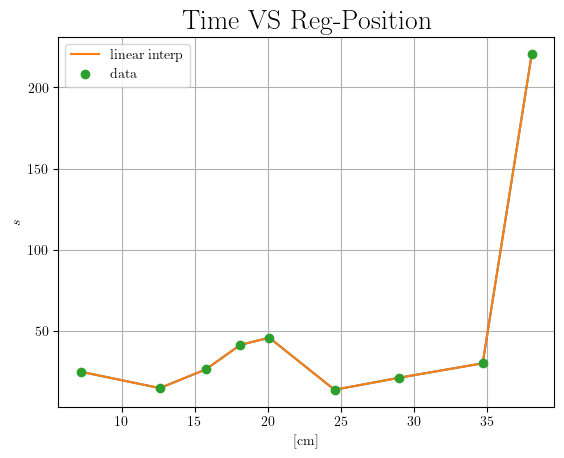

In [6]:
T=dfg.iloc[:,6]
plt.plot(x,T)

x = dfg.iloc[:,0]
yT = dfg.iloc[:,6]

xnewT = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew_T = np.interp(xnewT, x, yT)

plt.title(r'Time VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$s$')
plt.plot(xnewT, ynew_T, '-', label='linear interp')
plt.plot(x, yT,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 35
specific_y = np.interp(specific_x, x, yT)

# <center> Valutazione dell'errore </center>

---

Bisogna calcolare il valore dell'incertezza totale della misura cioè $\delta R$<br>
In questo caso abbiamo che la variabile $R$ corrisponde alla reattività $\rho$, mentre la variabile di incertezza è $T$ cioè il tempo.
$$\delta R=\bigg \{\sum^{N}_{i=0} \bigg(\frac{\partial R}{\partial X_i} \delta X_i\bigg)^2 \bigg\}^{1/2}$$
Il valore delle barre di errore per singola misura è 
$$\delta R_i= \frac{\partial R}{\partial X_i} \delta X_i$$
---

Uso come variabili :<br>
$\verb|drdt|=\frac{\partial R}{\partial X_i}$<br>
$\verb|drdtdt|=\frac{\partial R}{\partial X_i} \delta X_i$<br>
$\verb|dr|=\bigg \{\sum^{N}_{i=0} \bigg(\frac{\partial R}{\partial X_i} \delta X_i\bigg)^2 \bigg\}^{1/2}$



## Soluzione numerica per la stima dell'errore (NON ADATTA)
qui noi dobbiamo valutare la propagazione dell'errore fare derivate numeriche non produce nulla di buono in quanto derivare $\frac{d\rho}{dT}$ non è una semplice derivata rispetto ad una spaziatura $h\rightarrow dx$ che non segue nessuna logica, è quasi random. Lo schema di differenze centrate che viene applicato qui è $O(h^2)$ pertanto risente moltissimo della spaziatura scelta (step) e qui lo step è sia variabile che troppo elevato di conseguenza l'errore è enorme

+ Bisogna andare **analiticamente**

In [7]:
drdt=np.gradient(dfg["Int. $\rho$"],dfg["Time"],edge_order=1)
drdt
drdz=np.gradient(dfg["Int. $\rho$"],dfg["Reg(cm)"])
drdz
std_pos=np.std(dfg.iloc[2,4])
std_pos

display(drdt)

array([-1.46392382e+01, -1.83792817e+02,  6.99264025e+00,  1.25837758e+01,
        1.80120402e+01,  2.18911538e+01,  1.32109126e+01,  9.73159152e+00,
        8.61346458e-02])

In [8]:
drdtdt=drdt*2*dfg["STD_Time $\sigma$"]
drdzdz=drdz*2*std_pos
errb=np.sqrt(np.cumsum((drdtdt)**2))
dr=np.sqrt(np.sum((drdtdt)**2))
display(drdtdt,np.sum(drdt[:]),errb,dr) #pcm

0    -43.278561
1   -504.991342
2     15.565121
3     22.726932
4     61.644349
5     45.505526
6     28.136785
7     35.457646
8      2.907147
Name: STD_Time $\sigma$, dtype: float64

-115.9238068099813

0     43.278561
1    506.842470
2    507.081416
3    507.590460
4    511.319960
5    513.340875
6    514.111401
7    515.332686
8    515.340886
Name: STD_Time $\sigma$, dtype: float64

515.3408861651109

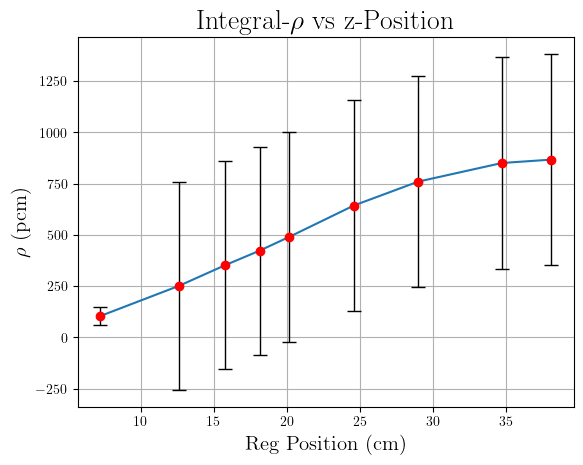

In [9]:
y_err=errb
plt.errorbar(x, y,yerr=y_err,ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,fmt='o',label='Error bar',color='r')
plt.title(r'Integral-$\rho$ vs z-Position',size=20)
plt.xlabel('Reg Position (cm)',size=15)
plt.ylabel(r'$\rho$ (pcm)',size=15)
plt.plot(dfg["Reg(cm)"], dfg["Int. $\rho$"], label='data')
plt.grid()
#plt.savefig('RhoZpos.pdf')
plt.show()

## Soluzione Analitica per la stima propagazione dell'errore (ADATTA)
TODO: analiticamente si calcolano le derivate della equazione
$$\rho=\frac{\Lambda}{\beta_{eff}T}+\sum^6_{i=1}\frac{\beta_i}{\beta_{eff}(1+\lambda_iT)}$$

In [10]:
import sympy as smp
from sympy.plotting import plot
from sympy.plotting import (plot, plot_parametric)
from fractions import Fraction

In [11]:
Lambda,betaeff,T=smp.symbols(r'\Lambda,\beta_{eff},T',real=True,positive=True)
betai = smp.IndexedBase('beta_i', shape=(6,))
lambdai = smp.IndexedBase('lambda_i', shape=(6,))
i=smp.symbols(r'i',integer=True,real=True,positive=True)
rho=smp.Function(r'\rho')

In [12]:
rho1=smp.Eq(rho(T,betaeff),Lambda/(betaeff*T)+smp.Sum((betai/betaeff)/(1+lambdai*T), (i, 1, 6)))
drho_dT=smp.Eq(smp.diff(rho(T,betaeff),T,1),smp.diff(rho1.rhs,T,1))
drho_db=smp.Eq(smp.diff(rho(T,betaeff),betaeff,1),smp.diff(rho1.rhs,betaeff,1))
display(rho1,drho_dT,drho_db)

Eq(\rho(T, \beta_{eff}), Sum(beta_i/(\beta_{eff}*(T*lambda_i + 1)), (i, 1, 6)) + \Lambda/(T*\beta_{eff}))

Eq(Derivative(\rho(T, \beta_{eff}), T), Sum(-beta_i*lambda_i/(\beta_{eff}*(T*lambda_i + 1)**2), (i, 1, 6)) - \Lambda/(T**2*\beta_{eff}))

Eq(Derivative(\rho(T, \beta_{eff}), \beta_{eff}), Sum(-beta_i/(\beta_{eff}**2*(T*lambda_i + 1)), (i, 1, 6)) - \Lambda/(T*\beta_{eff}**2))

In [13]:
#Dati numerici (file excel lorenzi)
beta_i=np.array([30.7,84.0,288,143,160,24.1])
lambda_i=np.array([3.01,1.14,0.301,0.111,0.0305,0.0124])
Lambda_num=5*10**(-5)
beta_eff=730

#derivata rispetto T (time period)
n=len(dfg["Time"])
drdt = np.zeros(n)
for i in range(n):
    drdt[i]-=-np.sum((beta_i*lambda_i)/(beta_eff*(dfg.iloc[i,6]*lambda_i+1)**2))-Lambda_num/(dfg.iloc[i,6]**2*beta_eff) #$
drdtdt=drdt*2*dfg["STD_Time $\sigma$"]*730  #pcm
display(drdtdt)
print(f"{np.sum(drdtdt)}[pcm]")

#derivata rispetto beta_eff
drdb=-np.sum(beta_i/(beta_eff**2*(dfg.iloc[-1,6]*lambda_i+1)))-Lambda_num/(dfg.iloc[-1,6]*beta_eff**2)
db=2*30
drdbdb=drdb*db
print(f"{np.abs(drdbdb)}[$],{np.abs(drdbdb*730)}[pcm]")

errb=np.sqrt(np.cumsum((drdtdt)**2))
display(errb)

0    12.479405
1    22.273862
2     8.750832
3     3.824236
4     6.281928
5    18.412327
6    11.067142
7    11.969945
8     5.001064
Name: STD_Time $\sigma$, dtype: float64

100.06074158721508[pcm]
0.004210382872461579[$],3.0735794968969525[pcm]


0    12.479405
1    25.531559
2    26.989582
3    27.259170
4    27.973647
5    33.489382
6    35.270673
7    37.246476
8    37.580721
Name: STD_Time $\sigma$, dtype: float64

RESULTS: calcolare le derivate col metodo numerico o col metodo analitco differisce di un 5% di errore addizonale introdotto dalla discretizzazione con le derivate centrali e ai bordi

### Differential Reactivity
TODO: aggiungere le error-bar in modalità cumulativa come precedentemente fatto per "integral-reactivity"

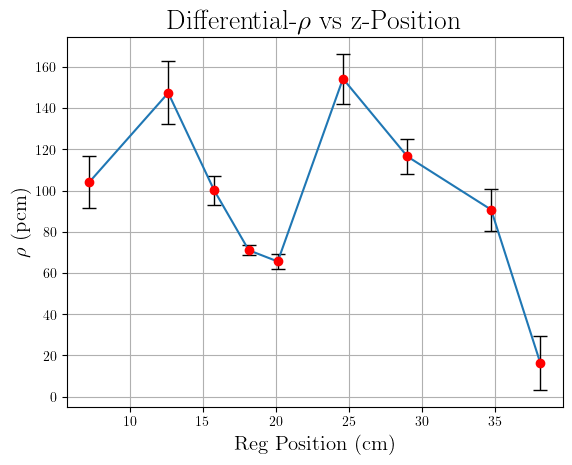

In [14]:
drdt=np.gradient(dfg["Diff. $\rho$"],dfg["Time"])
drdt

drdtdt=drdt*2*dfg["STD_Time $\sigma$"]
dr=np.sqrt(np.sum((drdtdt)**2))
drdtdt

y_err=drdtdt
plt.errorbar(dfg["Reg(cm)"], dfg["Diff. $\rho$"],yerr=y_err,ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,fmt='o',label='Error bar',color='r')
plt.title(r'Differential-$\rho$ vs z-Position',size=20)
plt.xlabel('Reg Position (cm)',size=15)
plt.ylabel(r'$\rho$ (pcm)',size=15)
plt.plot(dfg["Reg(cm)"], dfg["Diff. $\rho$"], label='data')
plt.grid()

### Interpolazione con cubic-spline
TODO: aggiungere le barre di errore in modo cumulativo all'interpolazione cubic-spline

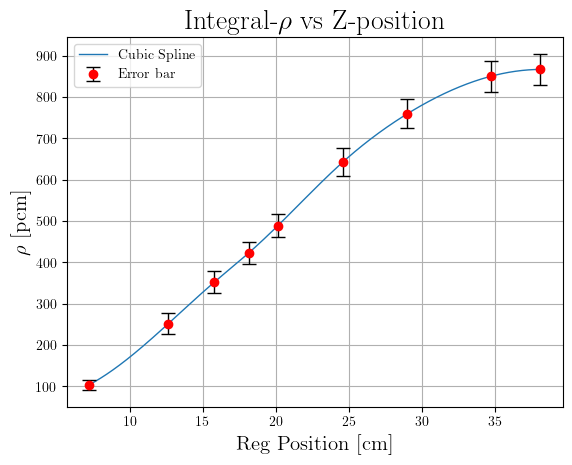

In [15]:
from scipy.interpolate import interp1d
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001, endpoint=True)
plt.plot(xnew, f2(xnew), '-',lw=1,label="Cubic Spline")
plt.errorbar(x, y, yerr=errb ,fmt='o', ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,label='Error bar',color='r')
#plt.plot(x,y,lw=1,label="normal plot")
#plt.plot(xnew, ynew_Irho, '-', lw=1,label='Piece-Wise linear')
plt.xlabel(r"Reg Position [cm]",size=15)
plt.ylabel(r" $\rho$ [pcm]",size=15)
plt.title(r"Integral-$\rho$ vs Z-position ",size=20)
plt.legend()
plt.grid()
plt.savefig('RhoZpos.pdf')

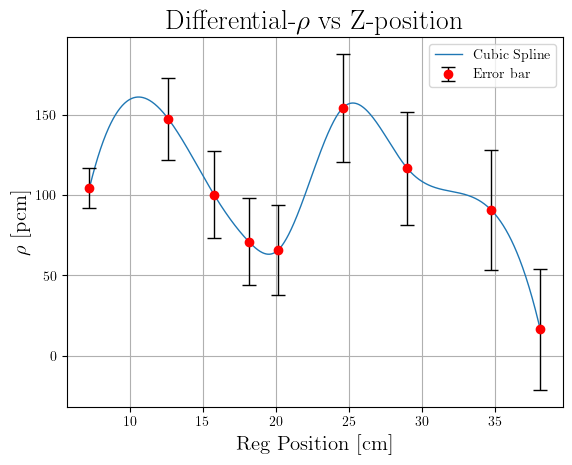

In [16]:
f3 = interp1d(dfg.iloc[:,0], dfg.iloc[:,4], kind='cubic')
xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001, endpoint=True)
plt.plot(xnew, f3(xnew), '-',lw=1,label="Cubic Spline")
plt.errorbar(dfg.iloc[:,0], dfg.iloc[:,4], yerr=errb ,fmt='o', ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,label='Error bar',color='r')
#plt.plot(x,y,lw=1,label="normal plot")
#plt.plot(xnew, ynew_Irho, '-', lw=1,label='Piece-Wise linear')
plt.xlabel(r"Reg Position [cm]",size=15)
plt.ylabel(r" $\rho$ [pcm]",size=15)
plt.title(r"Differential-$\rho$ vs Z-position ",size=20)
plt.legend()
plt.grid()
plt.savefig('RhoDiffZpos.pdf')

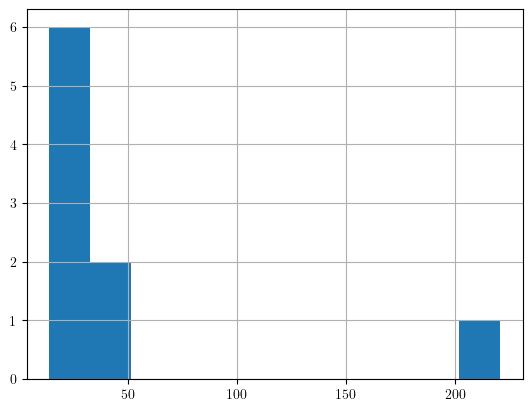

In [17]:
import seaborn as sns
plt.hist(dfg.iloc[:,6], bins=11)
plt.grid()


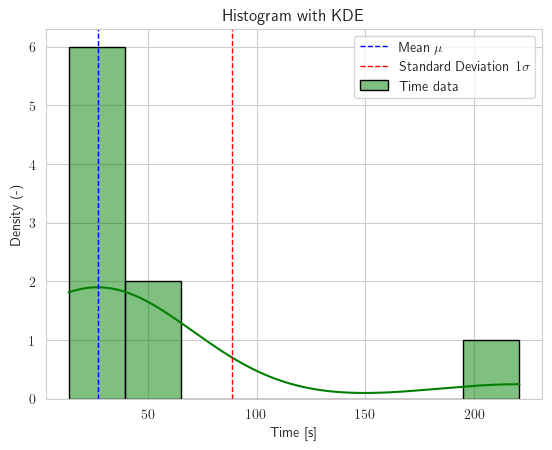

In [18]:
data = dfg.iloc[:, 6]
sns.set_style("whitegrid")
ax = sns.histplot(data, bins=8, kde=True, color='g', edgecolor='black',label="Time data")
std_dev = np.std(data)
mean=np.mean(dfg.iloc[:-1,6])
# Add labels, title, and grid
plt.xlabel('Time [s]')
plt.ylabel('Density (-)')
plt.title('Histogram with KDE')
plt.axvline(mean, color='blue', linestyle='--', linewidth=1,label=r"Mean $\mu$")
plt.axvline(mean+std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $1 \sigma$")
plt.legend()
# Show the plot
plt.show()

----
Test sulla KDE

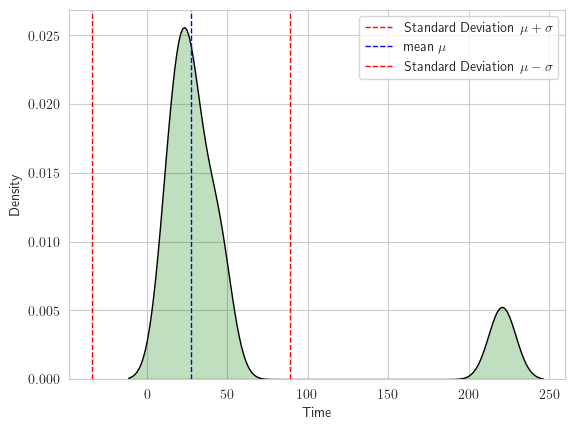

In [19]:
sns.set_style("whitegrid")
#sns.displot(x=dfg.iloc[:,6], kind="kde")
sns.kdeplot(x=dfg.iloc[:,6], color='g', fill=True, edgecolor='black',bw_adjust=0.2)
plt.axvline(mean+std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $\mu+\sigma$")
plt.axvline(mean, color='blue', linestyle='--', linewidth=1,label=r"mean $\mu$")
plt.axvline(mean-std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $\mu -\sigma$")
#sns.displot(x=dfg.iloc[:,6], bins=8)
plt.legend()
plt.show()

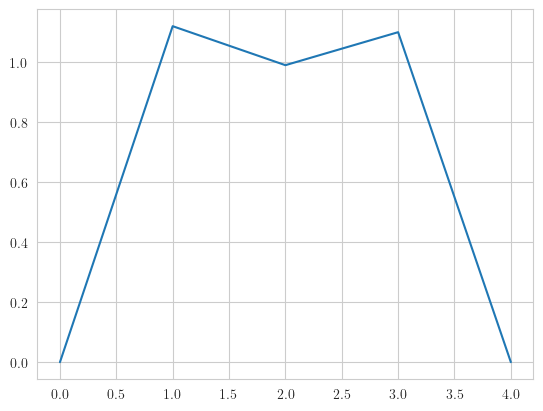

In [20]:
from scipy.stats import rv_histogram
import numpy as np

gg = np.random.random(10000)
r = rv_histogram(np.histogram(gg, bins=100))
gamma=r.pdf(np.linspace(0,1,5))

#plt.plot(gg)
plt.plot(gamma)

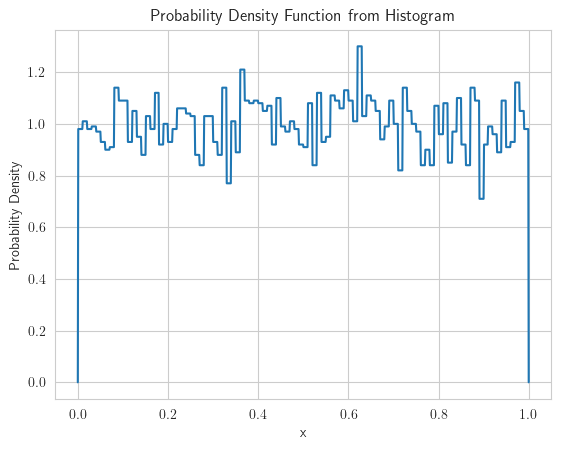

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import rv_histogram
import numpy as np

# Generate random data
gg = np.random.random(10000)

# Create a histogram
hist, bins = np.histogram(gg, bins=100)

# Create a probability density function using rv_histogram
r = rv_histogram((hist, bins))

# Evaluate the pdf at specified points
x_values = np.linspace(0, 1, 1000)
gamma = r.pdf(x_values)

# Plot the gamma values
plt.plot(x_values, gamma)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function from Histogram')
plt.show()


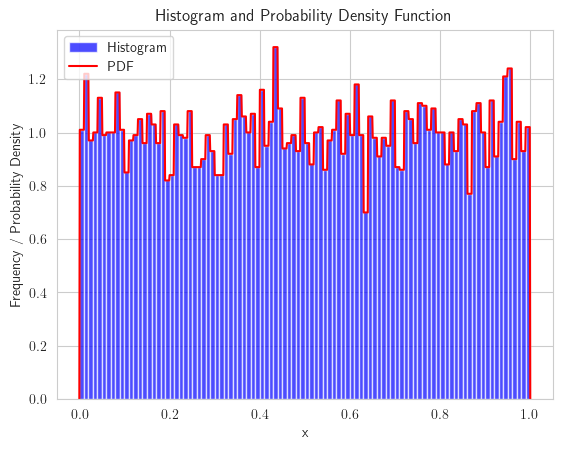

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rv_histogram

# Generate random data
gg = np.random.random(10000)

# Create a histogram
hist, bins = np.histogram(gg, bins=100)

# Create a probability density function using rv_histogram
r = rv_histogram((hist, bins))

# Evaluate the pdf at specified points
x_values = np.linspace(0, 1, 1000)
gamma = r.pdf(x_values)

# Plot the histogram
plt.hist(gg, bins=100, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot the probability density function
plt.plot(x_values, gamma, color='red', label='PDF')

plt.xlabel('x')
plt.ylabel('Frequency / Probability Density')
plt.title('Histogram and Probability Density Function')
plt.legend()
plt.show()


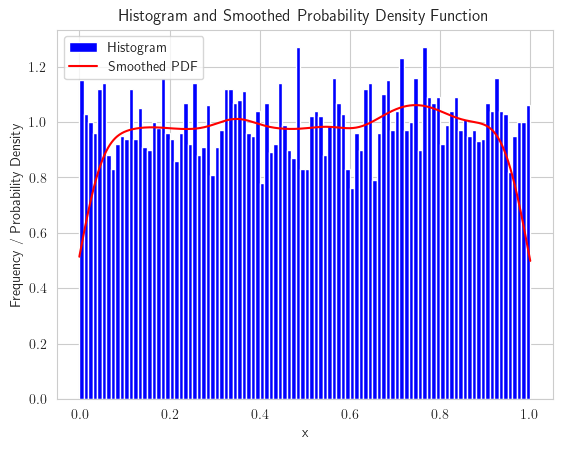

0.15848931924611134

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Generate random data
gg = np.random.random(10000)

# Create a kernel density estimation
kde = gaussian_kde(gg)

# Evaluate the KDE at specified points
x_values = np.linspace(0, 1, 1000)
smoothed_gamma = kde(x_values)

# Plot the histogram
plt.hist(gg, bins=100, density=True, alpha=1, color='blue', label='Histogram')

# Plot the smoothed probability density function
plt.plot(x_values, smoothed_gamma, color='red', label='Smoothed PDF')

plt.xlabel('x')
plt.ylabel('Frequency / Probability Density')
plt.title('Histogram and Smoothed Probability Density Function')
plt.legend()
plt.show()
display(kde.scotts_factor())

Fine test

---

# Probability Density Function (PDF)
Metodo alternativo per la PDF

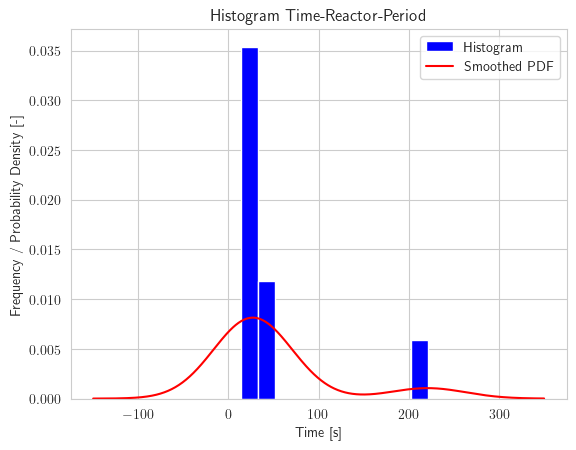

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Generate random data
gg = data

# Create a kernel density estimation
kde = gaussian_kde(gg)

# Evaluate the KDE at specified points
x_values = np.linspace(-150, 350, 1000)
smoothed_gamma = kde(x_values)

# Plot the histogram
plt.hist(gg, bins=11, alpha=1, color='blue', label='Histogram', density=True)

# Plot the smoothed probability density function
plt.plot(x_values, smoothed_gamma, color='red', label='Smoothed PDF')

plt.xlabel('Time [s]')
plt.ylabel('Frequency / Probability Density [-]')
plt.title('Histogram Time-Reactor-Period')
plt.legend()
plt.show()

Assumendo una distribuzione normale:

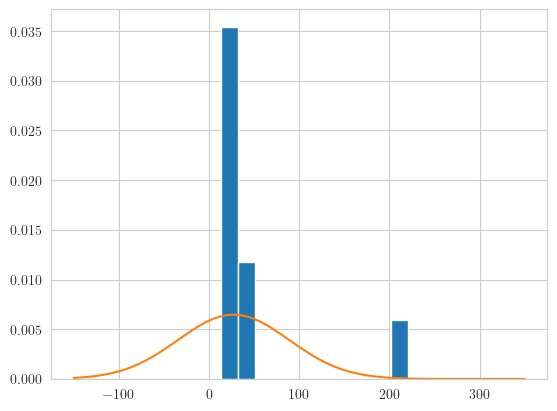

In [25]:
from scipy.stats import norm
sample_mean=mean
sample_std=std_dev
dist = norm(sample_mean, sample_std)
probabilities = dist.pdf(x_values)
plt.hist(dfg.iloc[:,6], bins=11, density=True)
plt.plot(x_values, probabilities)
plt.show()

Using RAW  data del Time reactor period:

Costruzione della probability density function, normalizzata, altrimenti la probability density function veniva schiacchiata dalla scala dell'istogramma. Questo è un probabile grafico finale

In [26]:
sample=np.array([25.79, 25.76, 27, 25.45, 25.9,
                  16.07, 16.49, 15.15, 16.14,
                  26.84, 27.59, 27.76, 26.21, 27.17,
                  42.37, 42.6, 40.92, 42.45, 42.08, 47,
                  14.7, 14.61, 14.58,
                  21.7, 22.17, 22.15, 22.19,
                  31.58, 31.84, 31.3, 31.56,
                  237, 237, 235, 237])
len(sample)

35

## Kolmogotrov-Smirnof Test

In [27]:
from scipy.stats import kstest

# Sample data
data_ks = np.random.randn(1000)

# Perform Kolmogorov-Smirnov test against a normal distribution
ks_statistic, p_value = kstest(data_ks, 'norm')
print("K-S Statistic:", ks_statistic)
print("P-value:", p_value)

K-S Statistic: 0.03315750055749078
P-value: 0.21672588878748145


+ **Data Resampling**: Facciamo un resample  del vettore resample in modo da usare KDE e trovare la funzione di distrubuzione che fitta in modo adeguato con un bw-factor che è di valore piccolo. Anche se questo non sempre corrisponde ad un esattezza della funzione di distribuzione infatti la media che ho trovato "mean" è differente rispetto al valore che si trova con KDE questo indica che avere un bw basso non perforza indica che il fit è buono.

+ Inoltre da come si vede in diversi grafici fatti, più è basso il valore di **K-S Statistic** più significa che siamo vicini alla nostra distribuzione che abbiamo scelto di testare rispetto ai nostri dati. Quindi dal valore di K-S statistic=0.0169 possiamo dire  che la distribuzione che abbiamo è una **distribuzione normale**, poi più **p-value** è elevato più siamo vicini alla nostra distribuzione di test, quindi un doppio controllo per  dire che abbiamo fatto un fit buono

## Bootstrapping e upsampling del dataset: "Sample"

(350000,)

0.07783705415511707

0.03506794973068121

25.712132132132133

27.209805555555555

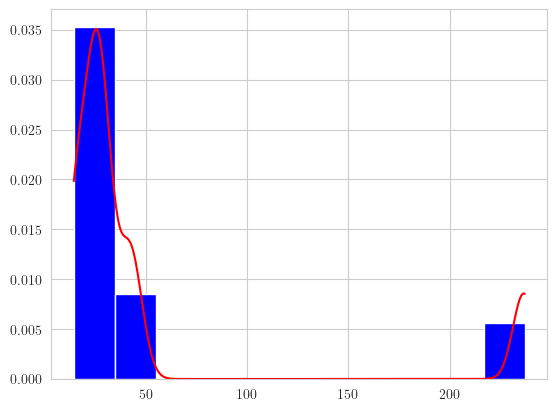

In [28]:
from sklearn.utils import resample
import numpy as np

# Sample data
original_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Resample the data
resampled_data = resample(sample, replace=True, n_samples=350000, random_state=5)

# Print the results
#print("Original Data:", sample)
#print("Resampled Data:", resampled_data)
display(np.shape(resampled_data))
kde1=gaussian_kde(resampled_data)
xx_values=np.linspace(min(resampled_data),max(resampled_data),1000)
smoothed_kde=kde1(xx_values)
plt.hist(resampled_data, bins=11, density=True, alpha=1, color='blue', label='Time raw')

# Plot the smoothed probability density function
plt.plot(xx_values, smoothed_kde, color='red', label='PDF') #PDF=probability density function
display(kde1.scotts_factor())
display(max(smoothed_kde),xx_values[np.argmax(smoothed_kde)],mean)
#plt.axvline(std)

KS test per la nuova distribuzione a cui ho fatto Up-sample

In [29]:
ks_statistic, p_value = kstest(resampled_data, 'norm')
print("K-S Statistic:", ks_statistic)
print("P-value:", p_value)

K-S Statistic: 1.0
P-value: 0.0


RESULT: La distribuzione a cui ho fatto up-sample è totalmente gaussiana

## Giusti dati statistici

In [30]:
#mean1=np.mean(sample)
std_dev1 = np.std(sample) #Deviazione standard
q3=np.percentile(sample, 75) #terzo quartile
q1 = np.percentile(sample, 25)
IQR1=q3-q1
outl1=q3+1.5*IQR1 #outlier
outl1


70.50999999999999

## doane's formula
serve per stimare il numero di bins, usando la ceiling-formula, quanto il numero di osservazioni è $n>30$

In [31]:
#doane's formula

sg1 = np.sqrt(6.0 * (len(sample) - 2.0) / ((len(sample) + 1.0) * (len(sample) + 3.0)))
    
# skewness
skew = np.mean(((data - np.mean(sample[:-4])) / np.std(sample[:-4]))**3)
    
# skewness correction
Ke = np.log2(1.0 + np.absolute(skew)/sg1)
display(Ke)

11.367636628507093

per una distribuzione che è gaussiana

In [32]:
""""std_dev = np.std(data) #Deviazione standard
Q3=0.6745*std_dev #terzo quartile
Q1=-0.6745*std_dev
IQR=Q3-Q1
outl=Q3+1.5*IQR #outlier
std_dev"""

'"std_dev = np.std(data) #Deviazione standard\nQ3=0.6745*std_dev #terzo quartile\nQ1=-0.6745*std_dev\nIQR=Q3-Q1\noutl=Q3+1.5*IQR #outlier\nstd_dev'

## Outlier Detection Test

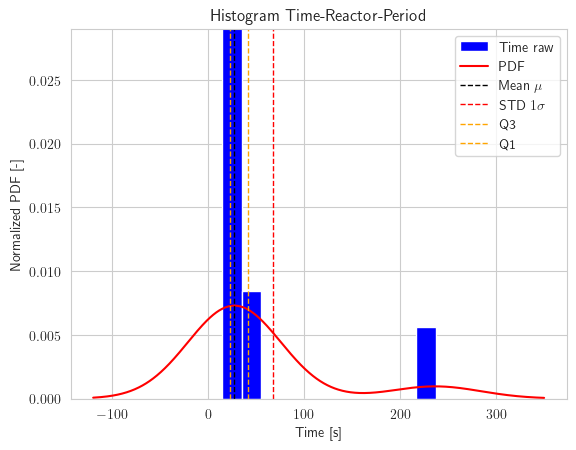

In [33]:
#dati sample
gg = sample

# Create a kernel density estimation
kde = gaussian_kde(gg,bw_method=0.698)

# Evaluate the KDE at specified points
x_values = np.linspace(-120, 350, 1000)
smoothed_gamma = kde(x_values)

# Plot the histogram
plt.hist(gg, bins=11, density=True, alpha=1, color='blue', label='Time raw')

# Plot the smoothed probability density function
plt.plot(x_values, smoothed_gamma, color='red', label='PDF') #PDF=probability density function
plt.axvline(mean, color='black', linestyle='--', linewidth=1,label=r"Mean $\mu$")
plt.axvline(std_dev1, color='red', linestyle='--', linewidth=1,label=r"STD $1 \sigma$")
#plt.axvline(outl1, color='green', lisnestyle='--', linewidth=1,label=r"Outlier Limit")
plt.axvline(q3, color='orange', linestyle='--', linewidth=1,label=r"Q3")
plt.axvline(q1, color='orange', linestyle='--', linewidth=1,label=r"Q1")
plt.xlabel('Time [s]')
plt.ylabel('Normalized PDF [-]')
plt.title('Histogram Time-Reactor-Period')
plt.legend()
#labely = ['0','5','10' ,'15','20','25','30'] #ho moltiplicato x1000 la scala delle y
#y=[0.000,0.005,0.010,0.015,0.020,0.025,0.030]               #punti in cui posizionare le nomenclature di "labely"
#plt.yticks(y, labely)
plt.ylim(0, 0.029)
#plt.savefig('Hist.pdf', format='pdf')
plt.show()


## Outlier Detection (corretto)
---

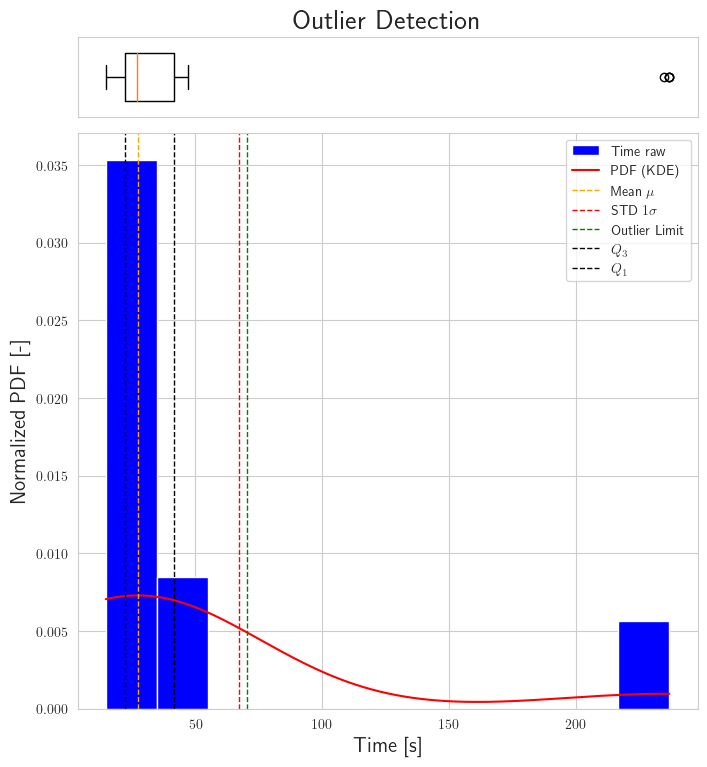

In [34]:
x_values1 = np.linspace(14.58, 237, 1000)
smoothed_gamma1 = kde(x_values1)
# Create subplots
fig, ax_main = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(top = 0.83)

# Scatter plot in the main figure
ax_main.hist(gg[:], bins=11, density=True, alpha=1, color='blue', label='Time raw')
ax_main.plot(x_values1, smoothed_gamma1, color='red', label='PDF (KDE)')
#ax_main.histplot(data, bins=8, kde=True, color='g', edgecolor='black',label="Time data")
# Create a boxplot on top
ax_box = fig.add_axes([ax_main.get_position().x0, ax_main.get_position().y1 + 0.02,
                        ax_main.get_position().width, 0.1])
ax_box.boxplot(gg[:], widths=0.6, vert=False)

#ax_main.plot(x_values, smoothed_gamma, color='red', label='PDF') #PDF=probability density function
ax_main.axvline(mean, color='orange', linestyle='--', linewidth=1,label=r"Mean $\mu$")
ax_main.axvline(std_dev1, color='red', linestyle='--', linewidth=1,label=r"STD $1 \sigma$")
ax_main.axvline(outl1, color='green', linestyle='--', linewidth=1,label=r"Outlier Limit")
ax_main.axvline(q3, color='black', linestyle='--', linewidth=1,label=r"$Q_3$")
ax_main.axvline(q1, color='black', linestyle='--', linewidth=1,label=r"$Q_1$")
ax_main.set_xlabel(r'Time [s]',size=15)
ax_main.set_ylabel(r'Normalized PDF [-]',size=15)
ax_main.legend()

ax_main.set_labely = ['0','5','10' ,'15','20','25','30'] #ho moltiplicato x1000 la scala delle y
y=[0.000,0.005,0.010,0.015,0.020,0.025,0.030]               #punti in cui posizionare le nomenclature di "labely"
#ax_main.set_yticks(y, labely)


ax_box.set_yticks([])
ax_box.set_xticks([])  # Remove x-axis ticks from the box plot
ax_box.set_title("Outlier Detection",size=20)
#plt.subplots_adjust(top=0.9)
#fig.savefig("Hist2.pdf", dpi=300)
plt.show()

### "Scott's rule" cioè "bw-factor" della KDE relativo ad outlier detection

In [35]:
f = kde.covariance_factor()
bw = f * sample.std()
scotts_factor = kde.scotts_factor()
scotts_factor

0.4911186099187366

---

### Test

In [36]:
std_dev = np.std(data) #Deviazione standard
Q3=0.6745*std_dev #terzo quartile
Q1=-0.6745*std_dev
IQR=Q3-Q1
outl=Q3+1.5*IQR #outlier
std_dev

61.67355604721843

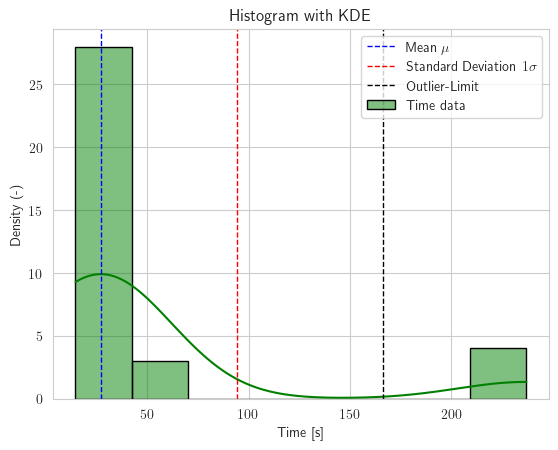

In [37]:
data = sample
sns.set_style("whitegrid")
ax = sns.histplot(data, bins=8, kde=True, color='g', edgecolor='black',label="Time data")
std_dev = np.std(data)
mean=np.mean(dfg.iloc[:-1,6])

# Add labels, title, and grid
plt.xlabel('Time [s]')
plt.ylabel('Density (-)')
plt.title('Histogram with KDE')
plt.axvline(mean, color='blue', linestyle='--', linewidth=1,label=r"Mean $\mu$")
plt.axvline(mean+std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $1 \sigma$")
plt.axvline(outl, color='k', linestyle='--', linewidth=1,label=r"Outlier-Limit")
plt.legend()
# Show the plot
plt.show()

---

# Fitting: sklearn

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Data
y= dfg["Int. $\rho$"].to_numpy()
x = dfg["Reg(cm)"].to_numpy()
# Reshape x for sklearn
x = x.reshape(-1,1)
display(np.shape(y))
display(np.shape(x))

(9,)

(9, 1)

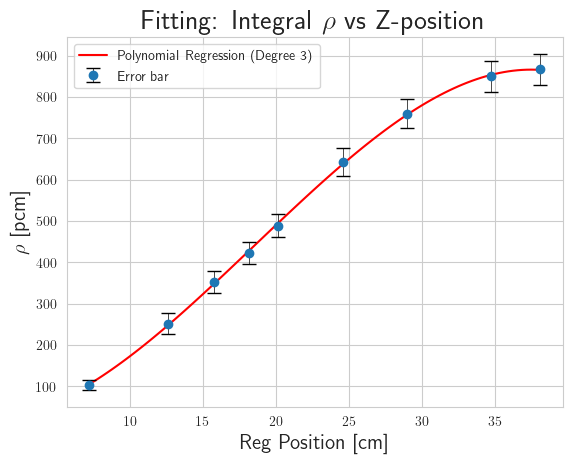

In [39]:
# Try polynomial regression
degree = 3  # Adjust the degree based on your data
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x, y)

# Generate predictions
x_pred = np.linspace(x[0,0], x[-1,0], 100).reshape(-1, 1)
y_pred = model.predict(x_pred)

# Plot the data and the fitted curve
#plt.scatter(x, y, label='CR position')
plt.plot(x_pred, y_pred, label=f'Polynomial Regression (Degree {degree})', color='red')
plt.errorbar(x, y, yerr=errb ,fmt='o', ecolor = 'k',elinewidth = 0.5, capsize=5,markeredgewidth=1,label='Error bar',color='tab:blue')
plt.xlabel(r'Reg Position [cm]',size=15)
plt.ylabel(r'$\rho$ [pcm]',size=15)
plt.title(r'Fitting: Integral $\rho$ vs Z-position',size=20)
plt.legend()
#plt.savefig('FitRhoDiffZpos.pdf')
plt.show()

TODO: aggiungere le bande di errore e calcolare $R^2$ del fitting

In [40]:
linear_reg_model = model.named_steps['linearregression']

# Retrieve the coefficients of the linear regression model
coefficients = linear_reg_model.coef_

# Retrieve the intercept of the linear regression model
intercept = linear_reg_model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 16.5944262275882
Coefficients: [ 0.          1.52999217  1.73325415 -0.03120212]


In [41]:
# Retrieve the linear regression model from the pipeline
linear_reg_model = model.named_steps['linearregression']

# Retrieve the coefficients of the linear regression model
coefficients = linear_reg_model.coef_

# Retrieve the intercept of the linear regression model
intercept = linear_reg_model.intercept_

# Print the equation
equation = f'y = {intercept:.2f}'
for i in range(1, len(coefficients)):
    equation += f' + ({coefficients[i]:.2f}) * x^{i}'

print("Equation:", equation)


Equation: y = 16.59 + (1.53) * x^1 + (1.73) * x^2 + (-0.03) * x^3


polinomial feature (degree+1) quindi 4 feature. I cui pesi sono qui listati. Si manipolano i dati introducendo questa non linearità nei dati in modo tale da trovare le possibili relazioni tra la variabile dipendente(y) e la variabile indipendente(x). Noi abbiamo come come obbiettivo trovare una relazione tra la x e y. Cio che sto usando qui non è una linear regression bensì una polinomial regression in quanto ho l'equazione:
$$y=c+w_0+w_1x^1+w_2x^2+w_3x^3$$

In [42]:
r_squared = model.score(x, y)

# Print the R-squared score
print("R-squared score:", r_squared)

R-squared score: 0.9997957224624554


generalmente:
1. creiamo polynomial feature
2. Usiamo un estimator (LinearRegression) che è sempre associato a fit() method. Infatti LinearRegression è una classe e *LinearRegression()* è il suo costruttore, d'altrocanto "model" non è altro che l'istanza della classe, cioè è la sua inizializzazione, come ogni classe contiene i suoi metodi all'interno e il metodo che ci serve a noi è fit()
3. fit() implementa in modo efficiente Oridnary Least Square Method (OLS) e calcola i pesi "$w_n$"

## Fitting using more OOP

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score  # For more accurate R-squared


class PolynomialRegressionModel:
    """
    Encapsulates polynomial regression modeling for clarity and reusability.

    Attributes:
        x (np.ndarray): Independent variable data.
        y (np.ndarray): Dependent variable data.
        degree (int): Degree of the polynomial to fit.
        model (sklearn.Pipeline): Fitted polynomial regression model.

    Methods:
        fit(self): Fits the polynomial regression model to the data.
        predict(self, x_new): Predicts y values for new x values.
        plot(self): Plots the data and the fitted polynomial curve with error bars.
        get_coefficients(self): Returns the model's coefficients and intercept.
        get_equation(self): Returns the polynomial equation as a string.
        get_r_squared(self): Returns the R-squared score of the model using sklearn.metrics.
    """

    def __init__(self, x, y, degree):
        self.x = x
        self.y = y
        self.degree = degree
        self.model = None

    def fit(self):
        self.model = make_pipeline(PolynomialFeatures(self.degree), LinearRegression())
        self.model.fit(self.x, self.y)

    def predict(self, x_new):
        return self.model.predict(x_new)

    def plot(self, **kwargs):
        """
        Plots the data and the fitted polynomial curve with error bars.

        Keyword arguments:
            errb (np.ndarray, optional): Array of error values for data points.
            color (str, optional): Color for the fitted curve.
            fmt (str, optional): Format string for data point markers.
            ecolor (str, optional): Color for error bars.
            elinewidth (float, optional): Width of error bars.
            capsize (float, optional): Size of error bar caps.
            markeredgewidth (float, optional): Width of data point marker edges.
            label (str, optional): Label for the fitted curve.
        """
        x_pred = np.linspace(self.x[0, 0], self.x[-1, 0], 100).reshape(-1, 1)
        y_pred = self.predict(x_pred)

        plt.figure(figsize=(8, 6))
        plt.scatter(self.x, self.y, **kwargs)
        plt.errorbar(self.x, self.y, yerr=errb ,fmt='o', ecolor = 'k',elinewidth = 0.5, capsize=5,markeredgewidth=1,label='Error bar',color='tab:blue')
        plt.plot(x_pred, y_pred, color='red')
        plt.xlabel(r'Reg Position [cm]', size=15)
        plt.ylabel(r'$\rho$ [pcm]', size=15)
        plt.title(r'Fitting: Integral $\rho$ vs Z-position', size=20)
        plt.legend()
        plt.show()

    def get_coefficients(self):
        """Retrieves model coefficients and intercept."""
        linear_reg_model = self.model.named_steps['linearregression']
        coefficients = linear_reg_model.coef_
        intercept = linear_reg_model.intercept_
        return intercept, coefficients

    def get_equation(self):
        """Generates a string representation of the polynomial equation."""
        intercept, coefficients = self.get_coefficients()
        equation = f'y = {intercept:.2f}'
        for i in range(1, len(coefficients)):
            equation += f' + ({coefficients[i]:.2f}) * x^{i}'
        return equation

    def get_r_squared(self):
        """Calculates and returns the R-squared score using sklearn.metrics."""
        return r2_score(self.y, self.model.predict(self.x))  # More accurate


# ... (data loading as before)

# Create and fit the model
model = PolynomialRegressionModel(x, y, degree=3)
model.fit()

# Print model information
intercept, coefficients = model.get_coefficients()
print("Intercept:", intercept)
print("Coefficients:", coefficients)

equation = model.get_equation()
print("Equation:", equation)

r_squared = model.get_r_squared()
print("R-squared score:", r)


Intercept: 16.5944262275882
Coefficients: [ 0.          1.52999217  1.73325415 -0.03120212]
Equation: y = 16.59 + (1.53) * x^1 + (1.73) * x^2 + (-0.03) * x^3
R-squared score: <scipy.stats._continuous_distns.rv_histogram object at 0x000001F20000AA60>


### Calling methods

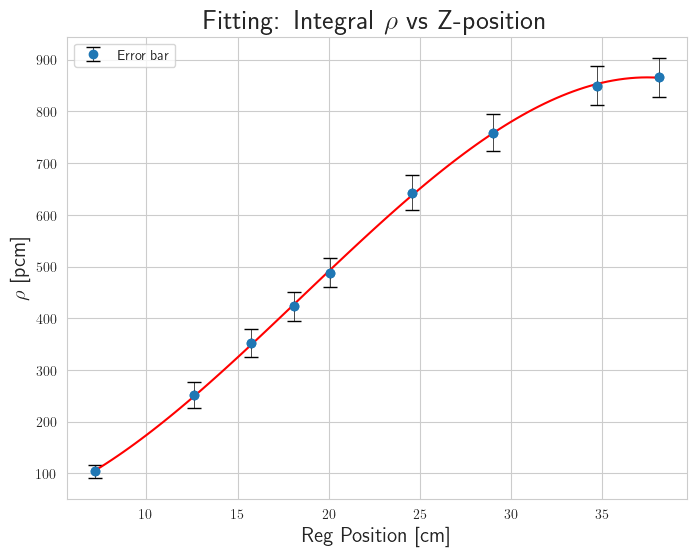

In [48]:
model = PolynomialRegressionModel(x, y, degree=3)
model.fit()


# Plot the data and the fitted curve
model.plot()